In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [2]:
# Load the dataset
df = pd.read_csv("C:\\Users\\User\\OneDrive\\Desktop\\spam.csv", encoding='latin-1')

# Drop unnecessary columns
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

# Rename columns for clarity
df.columns = ['label', 'text']

# Convert labels to binary values (0=ham, 1=spam)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)


Multinomial Naive Bayes Accuracy: 0.9623318385650225
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



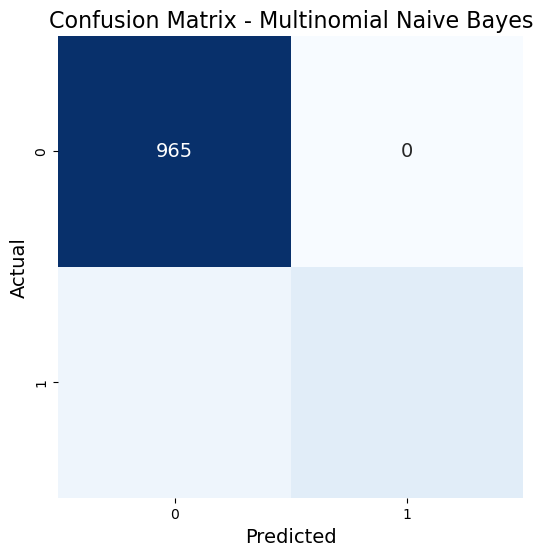

In [3]:
# Create a pipeline for TF-IDF and Multinomial Naive Bayes
nb_pipeline = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Train the model
nb_pipeline.fit(X_train, y_train)

# Predictions
nb_pred = nb_pipeline.predict(X_test)

# Evaluation
print("Multinomial Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print(classification_report(y_test, nb_pred))

# Confusion Matrix
nb_cm = confusion_matrix(y_test, nb_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 14})
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix - Multinomial Naive Bayes', fontsize=16)
plt.show()


Logistic Regression Accuracy: 0.9659192825112107
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       0.99      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



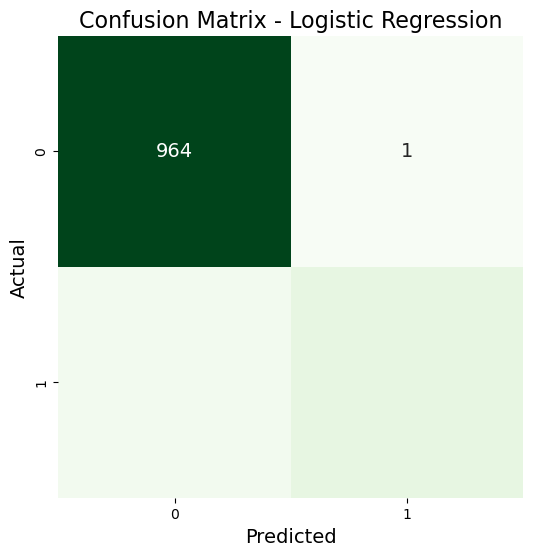

In [4]:
# Create a pipeline for TF-IDF and Logistic Regression
logreg_pipeline = make_pipeline(TfidfVectorizer(), LogisticRegression())

# Train the model
logreg_pipeline.fit(X_train, y_train)

# Predictions
logreg_pred = logreg_pipeline.predict(X_test)

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, logreg_pred))
print(classification_report(y_test, logreg_pred))

# Confusion Matrix
logreg_cm = confusion_matrix(y_test, logreg_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(logreg_cm, annot=True, fmt='d', cmap='Greens', cbar=False, annot_kws={'size': 14})
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix - Logistic Regression', fontsize=16)
plt.show()


SVM Accuracy: 0.9829596412556054
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.89      0.93       150

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



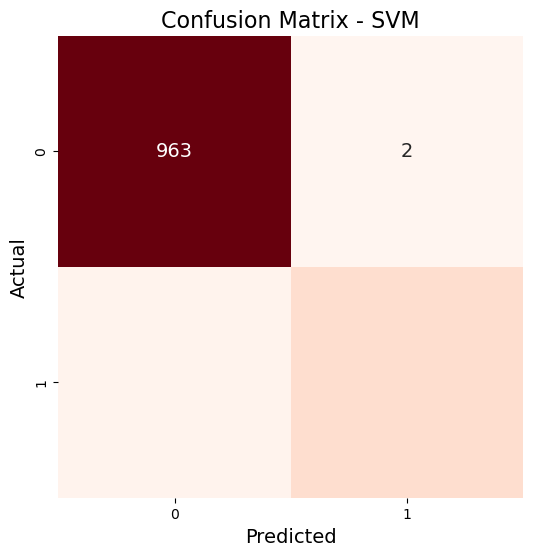

In [5]:
# Create a pipeline for TF-IDF and SVM
svm_pipeline = make_pipeline(TfidfVectorizer(), SVC(kernel='linear'))

# Train the model
svm_pipeline.fit(X_train, y_train)

# Predictions
svm_pred = svm_pipeline.predict(X_test)

# Evaluation
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))

# Confusion Matrix
svm_cm = confusion_matrix(y_test, svm_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Reds', cbar=False, annot_kws={'size': 14})
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix - SVM', fontsize=16)
plt.show()


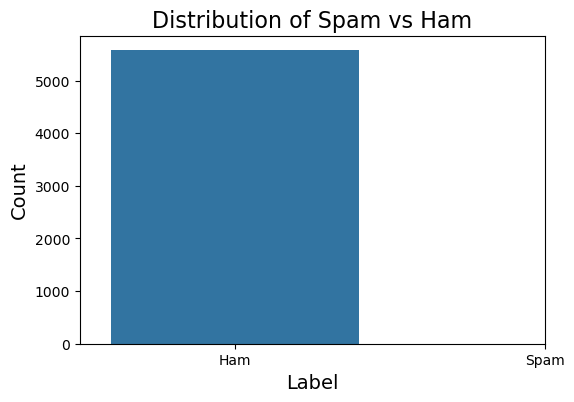

In [6]:
# Data Distribution
plt.figure(figsize=(6, 4))
sns.countplot(df['label'])
plt.title('Distribution of Spam vs Ham', fontsize=16)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.show()


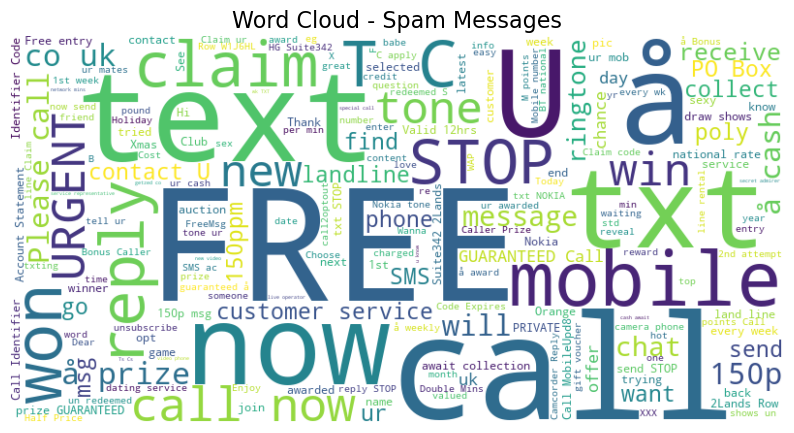

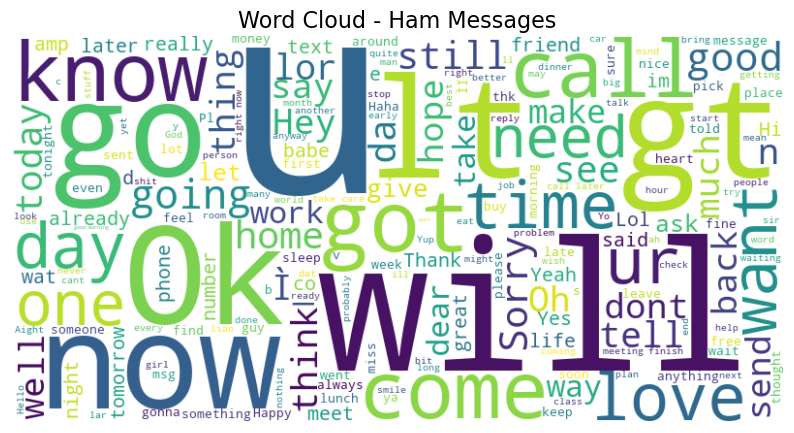

In [7]:
from wordcloud import WordCloud

# Generate word clouds
spam_words = ' '.join(list(df[df['label'] == 1]['text']))
ham_words = ' '.join(list(df[df['label'] == 0]['text']))

# Word Cloud for Spam messages
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_words)
plt.figure(figsize=(10, 6))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Spam Messages', fontsize=16)
plt.show()

# Word Cloud for Ham messages
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_words)
plt.figure(figsize=(10, 6))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Ham Messages', fontsize=16)
plt.show()
